In [2]:
# Install required libraries
%pip install sentence-transformers torch --quiet

import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer

df = pd.read_csv('netflix_titles.csv')


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
df_clean = df.dropna(subset=['description', 'cast']).copy()
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [4]:
df_clean['director'] = df_clean['director'].fillna('Unknown')
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [5]:
df_clean['cast'] = df_clean['cast'].apply(lambda x: [actor.strip() for actor in x.split(',')])
df_clean['listed_in'] = df_clean['listed_in'].apply(lambda x: [genre.strip() for genre in x.split(',')])
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,Unknown,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"[Kate Siegel, Zach Gilford, Hamish Linklater, ...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"[TV Dramas, TV Horror, TV Mysteries]",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",NaN,"September 24, 2021",2021,PG,91 min,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...


In [6]:
model = SentenceTransformer('all-MiniLM-L6-v2')
descriptions = df_clean['description'].tolist()
embeddings = model.encode(descriptions, show_progress_bar=True)

Batches: 100%|██████████| 250/250 [00:07<00:00, 34.37it/s]


In [7]:
import numpy as np
np.save('description_embeddings.npy', embeddings)
df_clean.to_csv('netflix_cleaned.csv', index=False)

In [8]:
# Finished: Embeddings saved as 'description_embeddings.npy', DataFrame as 'netflix_cleaned.csv'

In [9]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

In [10]:
df = pd.read_csv('netflix_cleaned.csv')
embeddings = np.load('description_embeddings.npy')
G = nx.Graph()

In [11]:
for idx, row in df.iterrows():
    G.add_node(idx, title=row['title'], genres=row['listed_in'], cast=row['cast'], director=row['director'])

In [12]:
cos_sim_matrix = cosine_similarity(embeddings)

In [13]:
TOP_K = 5
for i in tqdm(range(len(df))):
    top_indices = np.argsort(cos_sim_matrix[i])[-(TOP_K+1):-1]
    for j in top_indices:
        sim_score = cos_sim_matrix[i, j]
        G.add_edge(i, j, weight=sim_score, type='text_similarity')

100%|██████████| 7982/7982 [00:04<00:00, 1890.78it/s]


In [14]:
# Add edges for shared cast
for i in tqdm(range(len(df))):
    for j in range(i + 1, len(df)):
        cast_i = set(eval(df.loc[i, 'cast']))
        cast_j = set(eval(df.loc[j, 'cast']))
        if len(cast_i & cast_j) > 0:
            G.add_edge(i, j, weight=1.0, type='shared_cast')

100%|██████████| 7982/7982 [15:05<00:00,  8.82it/s] 


In [15]:
for i in tqdm(range(len(df))):
    for j in range(i + 1, len(df)):
        if df.loc[i, 'director'] == df.loc[j, 'director'] and df.loc[i, 'director'] != 'Unknown':
            G.add_edge(i, j, weight=1.0, type='shared_director')

100%|██████████| 7982/7982 [03:51<00:00, 34.43it/s] 


In [16]:
print(f"✅ Graph built with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

✅ Graph built with 7982 nodes and 108245 edges.


In [17]:
%pip install node2vec

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:

from node2vec import Node2Vec
import numpy as np

node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)
node_embeddings = np.array([model.wv[str(i)] for i in range(len(df))])
np.save("graph_embeddings.npy", node_embeddings)

Computing transition probabilities: 100%|██████████| 7982/7982 [00:16<00:00, 482.70it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set th

Clustering and Analysis:

In [19]:
%pip install matplotlib

from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

embeddings = np.load('graph_embeddings.npy')
df = pd.read_csv('netflix_cleaned.csv')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
N_CLUSTERS = 15
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)
df['cluster'] = cluster_labels
df.to_csv("clustered_netflix.csv", index=False)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Visualization

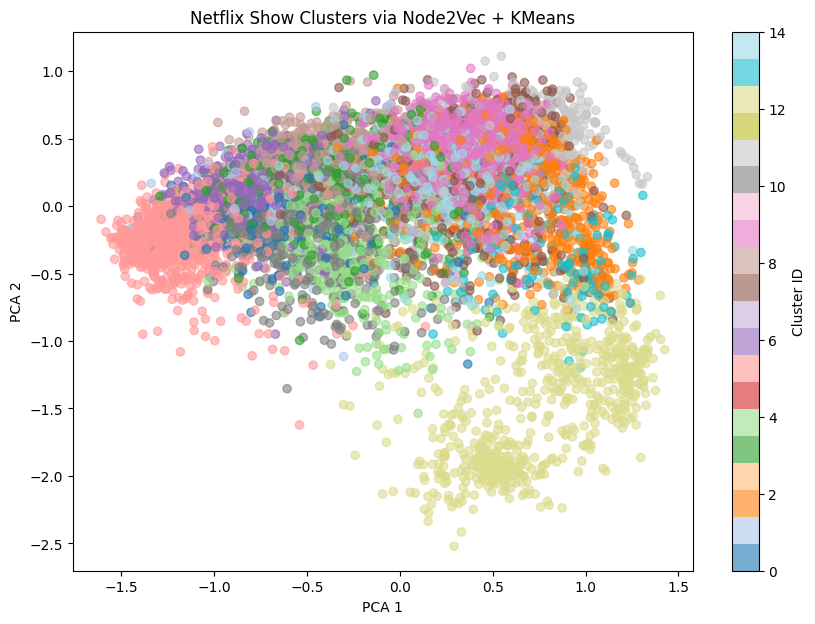

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=cluster_labels, cmap='tab20', alpha=0.6)
plt.title("Netflix Show Clusters via Node2Vec + KMeans")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label='Cluster ID')
plt.show()

Recommendation System

In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv("clustered_netflix.csv")
embeddings = np.load("graph_embeddings.npy")

def recommend(title, top_k=5):
    if title not in df['title'].values:
        return f"❌ Title '{title}' not found."

    # Get index and cluster
    idx = df[df['title'] == title].index[0]
    cluster_id = df.loc[idx, 'cluster']

    # Get shows in the same cluster
    cluster_members = df[df['cluster'] == cluster_id].index.tolist()

    # Compute cosine similarities within cluster
    sims = cosine_similarity(
        [embeddings[idx]],
        embeddings[cluster_members]
    )[0]

    # Pair similarity with titles
    results = [
        (df.loc[i, 'title'], sims[n])
        for n, i in enumerate(cluster_members)
        if i != idx
    ]

    # Sort and return top-k recommendations
    top_matches = sorted(results, key=lambda x: x[1], reverse=True)[:top_k]
    print(f"\n🎬 Recommendations similar to **{title}**:\n")
    for i, (rec_title, score) in enumerate(top_matches, 1):
        print(f"{i}. {rec_title} (similarity: {score:.3f})")

In [24]:
recommend("Outer Banks", top_k=5)


🎬 Recommendations similar to **Outer Banks**:

1. Mine 9 (similarity: 0.694)
2. The 100 (similarity: 0.687)
3. Miss Virginia (similarity: 0.669)
4. Bullitt County (similarity: 0.582)
5. American Horror Story (similarity: 0.567)
